In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
consumer_key = "8gkozHxDwmXsvgLvqXMBWcx9T"
consumer_secret = "ycxz3P69xHVYUNY6ViqvYVxAuahB886yLSF4qTxCJ46NnR8tIH"
access_token = "1331481154189361153-S55qEPfYnPzwLIMFLUonKFt9Z9H3hX"
access_token_secret = "i3S0tbdBqBSxtC32UVGZt8VGjFMlFwDUvkeUkEVfiSrfS"

# Create the authentication object
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    
# Set the access token and access token secret
authenticate.set_access_token(access_token, access_token_secret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [26]:
# Extract  100 tweets from the twitter user
posts = api.user_timeline(screen_name="America", count = 200, lang ="en", tweet_mode="extended")

#  Print the last 10 tweets
print("Show the 10 recent tweets:\n")
i=1
for tweet in posts[:10]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 10 recent tweets:

1) Where else is it supposed to go? https://t.co/bbQQ1b6h40

2) None worth dying for https://t.co/VyaN8ZteIT

3) @realDonaldTrump So your plan is to.....pretend theres not a problem? How original

4) @funder This is egregious and is absolutely anti American.

5) @elonmusk Freedom is not the question here, its safety.  You're irresponsible.  Are you even a full time resident?

6) These are tough times. Hold tight to your values,  they will always guide you in the end

7) Physical distancing

8) @YG_Ayce 😣😣😣😣😣😣😣😣

9) Quarantine Day 376:  sewed an extra Star on the flag in Case Florida tries to Secede from itself.

10) @curvyandcaramel I lost count.



In [27]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 10 rows of data
df.head()

,Tweets
0,Where else is it supposed to go? https://t.co/...
1,None worth dying for https://t.co/VyaN8ZteIT
2,@realDonaldTrump So your plan is to.....preten...
3,@funder This is egregious and is absolutely an...
4,"@elonmusk Freedom is not the question here, it..."


In [28]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Where else is it supposed to go?
1,None worth dying for
2,So your plan is to.....pretend theres not a p...
3,This is egregious and is absolutely anti Amer...
4,"Freedom is not the question here, its safety...."
...,...
190,Gotta do what I gotta do. Word to my nigga Dri...
191,"My nigga, I just told you I'm not racist. I'm ..."
192,: u right fam.. u always right
193,I've been subtweeting black folks since the 60...


In [30]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Where else is it supposed to go?,0.000000,0.000000
1,None worth dying for,0.100000,0.300000
2,So your plan is to.....pretend theres not a p...,0.750000,0.375000
3,This is egregious and is absolutely anti Amer...,0.450000,0.100000
4,"Freedom is not the question here, its safety....",0.550000,0.350000
...,...,...,...
190,Gotta do what I gotta do. Word to my nigga Dri...,0.000000,0.000000
191,"My nigga, I just told you I'm not racist. I'm ...",0.517857,0.250000
192,: u right fam.. u always right,0.535714,0.285714
193,I've been subtweeting black folks since the 60...,0.433333,-0.166667


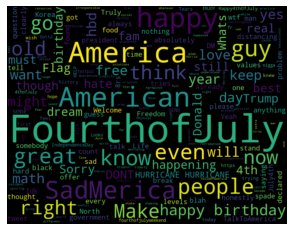

In [33]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=900, height=700, random_state=21, max_font_size=500).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [34]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Where else is it supposed to go?,0.000000,0.000000,Neutral
1,None worth dying for,0.100000,0.300000,Positive
2,So your plan is to.....pretend theres not a p...,0.750000,0.375000,Positive
3,This is egregious and is absolutely anti Amer...,0.450000,0.100000,Positive
4,"Freedom is not the question here, its safety....",0.550000,0.350000,Positive
...,...,...,...,...
190,Gotta do what I gotta do. Word to my nigga Dri...,0.000000,0.000000,Neutral
191,"My nigga, I just told you I'm not racist. I'm ...",0.517857,0.250000,Positive
192,: u right fam.. u always right,0.535714,0.285714,Positive
193,I've been subtweeting black folks since the 60...,0.433333,-0.166667,Negative


In [35]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) None worth dying for 

2)  So your plan is to.....pretend theres not a problem? How original

3)  This is egregious and is absolutely anti American.

4)  Freedom is not the question here, its safety.  You're irresponsible.  Are you even a full time resident?

5) We urge you all to practice social distancing

6) Welcome to America

7) When was I happy? 

8)  Wow thos was a whole different tweet before somebody declared war on Iran

9) ......... For real?

10) Yeah but you love it 

11)  Because Americans are met with swifter and more complete retribution  by the state

12) Love is more American than anything

13) Good Morning Me (America)

14) Life love and liberty

15)  We must have educational resources that simplify the overall problems so that when solutions are presented they can be readily understood.

16)  The unwillingness to call a spade a spade is detroying my values. 

We cannot stand fpr anything positive if we keep ignoring white nationalist te

In [36]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) These are tough times. Hold tight to your values,  they will always guide you in the end

2) Quarantine Day 376:  sewed an extra Star on the flag in Case Florida tries to Secede from itself.

3) What are you most afraid of? TalkToAmerica

4) Truly sorry for the levels of incompetence I'm showing at all levels of government

5) We are having a rough go of it

6)   I mean its whatever

7) 4 score and 7.... wait wtf is happening right now?

8)  There's at Least 2. It counts. I checked Stephen.

9)  You're not seeing them hard enough

10) So I know you guys are all saying like..... "Wtf ? Whats with the border and the illegals and the blah blah"

I was on a break.

11) If any man or woman tries to convince you that freedom is already yours, roll over them on the path

12) The Constructs which trap you are less than 100 years old

13) So  is one of my sports ambassadors now? Not the worst thing to happen to me in 2017

14) Making radical Changes in government i

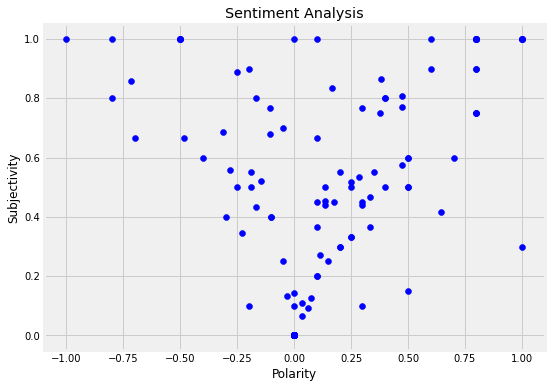

In [37]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [38]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

34.4

In [39]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

16.4

In [40]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     96
Positive    67
Negative    32
Name: Analysis, dtype: int64

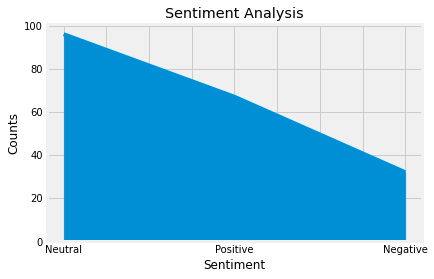

In [41]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'area')
plt.show()

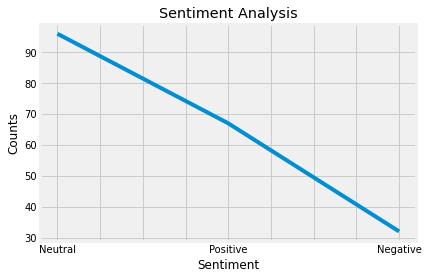

In [42]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()

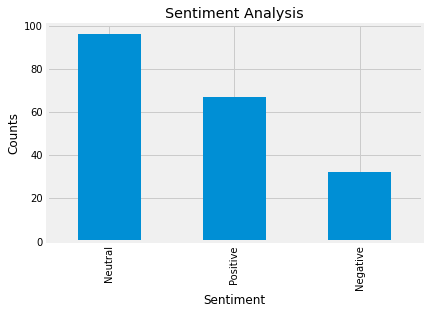

In [43]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()